# Empirical Cross Covariance

Note that the analysis below assumes realizations are independent across time. This is a bad assumption, but should still provide a reasonable approximation.

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, "../src")

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import variogram as vgm

In [5]:
# Get data: detrended 5-degree monthly average, cont. US
df = pd.read_csv("../data/exp_pro/OCO2_5deg_monthly_conus.csv")

# Isolate 2019
df["time"] = pd.to_datetime(df["time"])
df = df[df.time.dt.year == 2019]

# Standardize data locally
columns = ["xco2_res", "sif_res"]
df[columns] = df.groupby(["lon", "lat"])[columns].transform(lambda x: (x - x.mean()) / x.std())

df.head()

,lat,lon,time,sif_res,xco2_res
52,12.5,-92.5,2019-01-01,-0.542864,-0.165133
53,12.5,-92.5,2019-02-01,-1.047602,0.325714
54,12.5,-92.5,2019-03-01,-1.555631,0.840372
55,12.5,-92.5,2019-04-01,-0.168187,1.615102
56,12.5,-92.5,2019-05-01,0.235828,1.042413


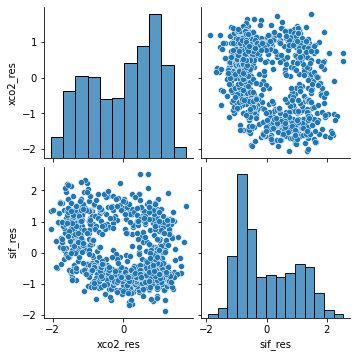

In [8]:
# Check distributions
sns.pairplot(df, vars=["xco2_res", "sif_res"])

In [24]:
space_lags = np.linspace(0, 5e3, 50)
df_vgm = vgm.empirical_variogram(
    df,
    ["xco2_res", "sif_res"],
    space_lags,
    tol=500,
    time_lag=1,
    cross=False,
)
df_cov = vgm.empirical_variogram(
    df,
    ["xco2_res", "sif_res"],
    space_lags,
    tol=500,
    time_lag=1,
    covariogram=True,
)

Text(0.5, 0.98, 'Variograms and cross covariogram for XCO2 and SIF\ntemporal lag: 1 month, spatial tolerance: 500 km')

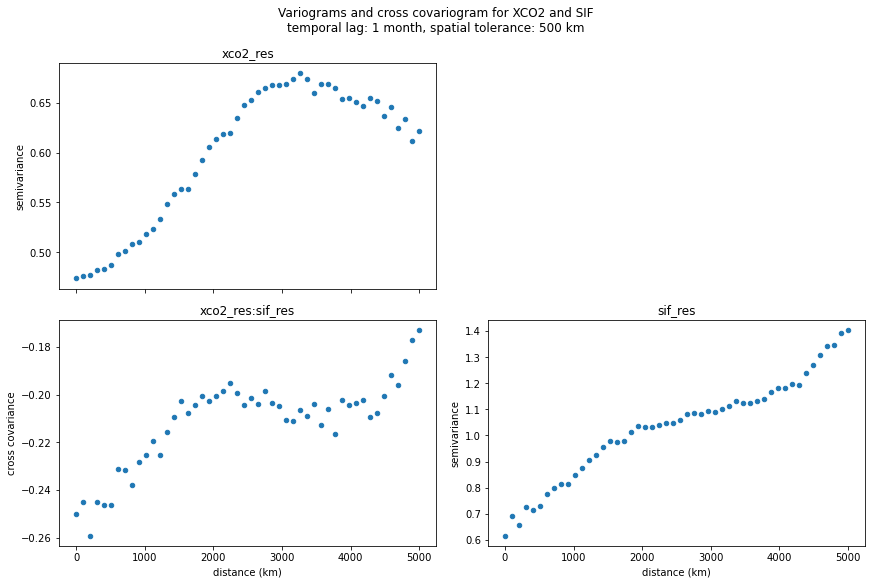

In [36]:
cols = df_cov.columns[df_cov.columns!="lag"]
fig, ax = plt.subplots(2, 2, figsize=(12, 9), constrained_layout=True, sharex=True)
ax[0, 1].axis("off")

ax[0, 0].set_title(cols[0])
df_vgm.plot(x="lag", y=cols[0], kind="scatter", ax=ax[0, 0])
ax[0, 0].set_ylabel("semivariance")

ax[1, 1].set_title(cols[1])
df_vgm.plot(x="lag", y=cols[1], kind="scatter", ax=ax[1, 1])
ax[1, 1].set_ylabel("semivariance")
ax[1, 1].set_xlabel("distance (km)")

ax[1, 0].set_title(cols[-1])
df_cov.plot(x="lag", y=cols[-1], kind="scatter", ax=ax[1, 0])
ax[1, 0].set_ylabel("cross covariance")
ax[1, 0].set_xlabel("distance (km)")

fig.suptitle("Variograms and cross covariogram for XCO2 and SIF\n"+
            f"temporal lag: {1} month, spatial tolerance: {500} km");

# NOTE: inlcude time lag and tolerance in subtitle